# 1. 数据可视化

安装必要的 Python 库

In [1]:
# !pip install plotly optuna seaborn lightgbm scikit-learn pandas numpy

In [2]:
DIRECTORY='./data/adult'
TRAIN_FILE='adult.data'
COLS=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
          'hours-per-week', 'native-country', 'income']

In [3]:
# coding: utf-8
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import util

## 一、导入数据

In [4]:
csv_file = util.gen_abspath(DIRECTORY, TRAIN_FILE)
df = util.read_csv(csv_file, sep=',', header=None)
df.columns=COLS

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 二、统计描述

### 2.1 `describe()` 方法

用 `describe()` 方法获得字段的 最大值、最小值、分位数、标准差 等信息

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# df[df['income'] == ' >50K'].describe()

In [7]:
# df[df['income'] == ' <=50K'].describe()

### 2.2 `info()` 方法

用 `info()` 方法获得字段的 非空值个数、数据类型 等信息

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 2.3 统计各字段枚举值数量

使用 `df[col].value_counts()` 方法统计各字段（`col`）枚举值数量

In [9]:
# 统计各字段枚举值数量
val_cnt_list = []
for col in df.columns:
    val_cnt_list.append(len(df[col].value_counts()))

# 初始化 DataFrame 以存储统计结果
df_val_cnt = pd.DataFrame({
    'col_name': df.columns,
    'val_cnt': val_cnt_list
})

df_val_cnt

,col_name,val_cnt
0,age,73
1,workclass,9
2,fnlwgt,21648
3,education,16
4,education-num,16
5,marital-status,7
6,occupation,15
7,relationship,6
8,race,5
9,sex,2


### 2.4 查看字段下所有枚举值

使用 `df[col].value_counts.index` 获取某列所有枚举值

In [10]:
df['income'].value_counts().index.tolist()

[' <=50K', ' >50K']

### 2.5 查看空值个数

In [18]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [21]:
# 可以用 dropna 方法丢掉所有包含空值的数据行
# df = df.dropna()

## 三、可视化

### 3.1 标号的值的比例 

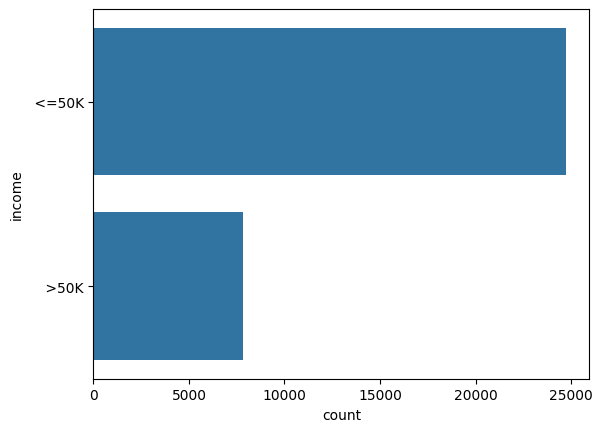

In [11]:
ax = sns.countplot(df['income'], label="Count")

In [12]:
lt_50, gt_50 = df['income'].value_counts()
print('income <= 50K: ', lt_50)
print('income > 50K: ', gt_50)

income <= 50K:  24720
income > 50K:  7841


### 3.2 小提琴图 (Violin Plot)

In [13]:
# 找到 dtypes 为 object 的列的列名，做成一个列表
obj_type_cols = [col for col in df.columns if df[col].dtypes == np.dtype('object')]

# X: 特征，y: 标签
X = df.drop(obj_type_cols, axis=1)
y = df['income']

# 标准化 standardization
X_n2 = (X - X.mean()) / X.std()
df_concat = pd.concat([y, X_n2], axis=1)
# df_concat

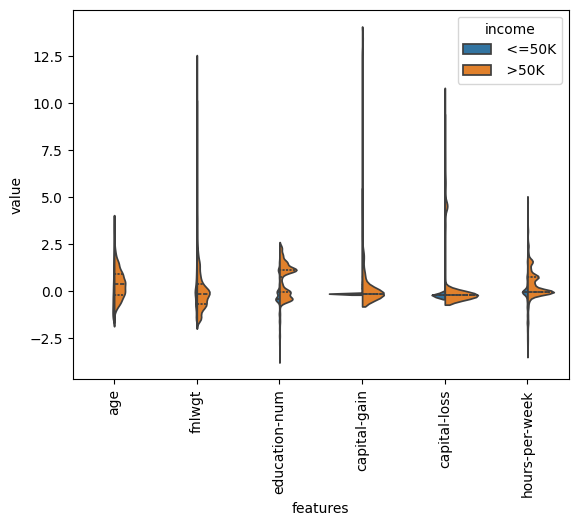

In [14]:
df_melt = pd.melt(df_concat, id_vars="income", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="income", data=df_melt, split=True, inner="quart")
_ = plt.xticks(rotation=90)

参考：

- [Feature Selection and Data Visualization](https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization)